### Jakub Przybył 261348                                                                                                                             
### Informatyczne systemy automatyki, 1. rok, 1. sem

# __XOR Neural Network__

### **Introduction**

The XOR (exclusive OR) problem stands as a foundational challenge in the field of artificial intelligence, particularly within the realms of neural networks and machine learning. This problem, first popularized by Marvin Minsky and Seymour Papert in their seminal work Perceptrons (1969), illustrates the limitations of early neural network models to solve non-linearly separable data patterns. The XOR problem involves a binary classification task where the classes are separated in a way that no linear decision boundary can effectively discriminate between them.

The breakthrough in solving the XOR problem came with the introduction of multi-layer neural networks, also known as multi-layer perceptrons (MLPs). These networks incorporate one or more hidden layers between the input and output layers, enabling them to learn non-linear functions. The key was the utilization of non-linear activation functions in the hidden layers, such as the sigmoid function, which allowed the network to create complex decision boundaries. By adding these hidden layers, neural networks gained the ability to approximate virtually any function, including the XOR function. This development not only resolved the XOR challenge but also marked a pivotal moment in the evolution of neural networks, leading to the resurgence of interest in neural network research and applications across various domains. The resolution of the XOR problem thus catalyzed advancements in deep learning, highlighting the critical role of architecture depth and non-linearity in neural network design.


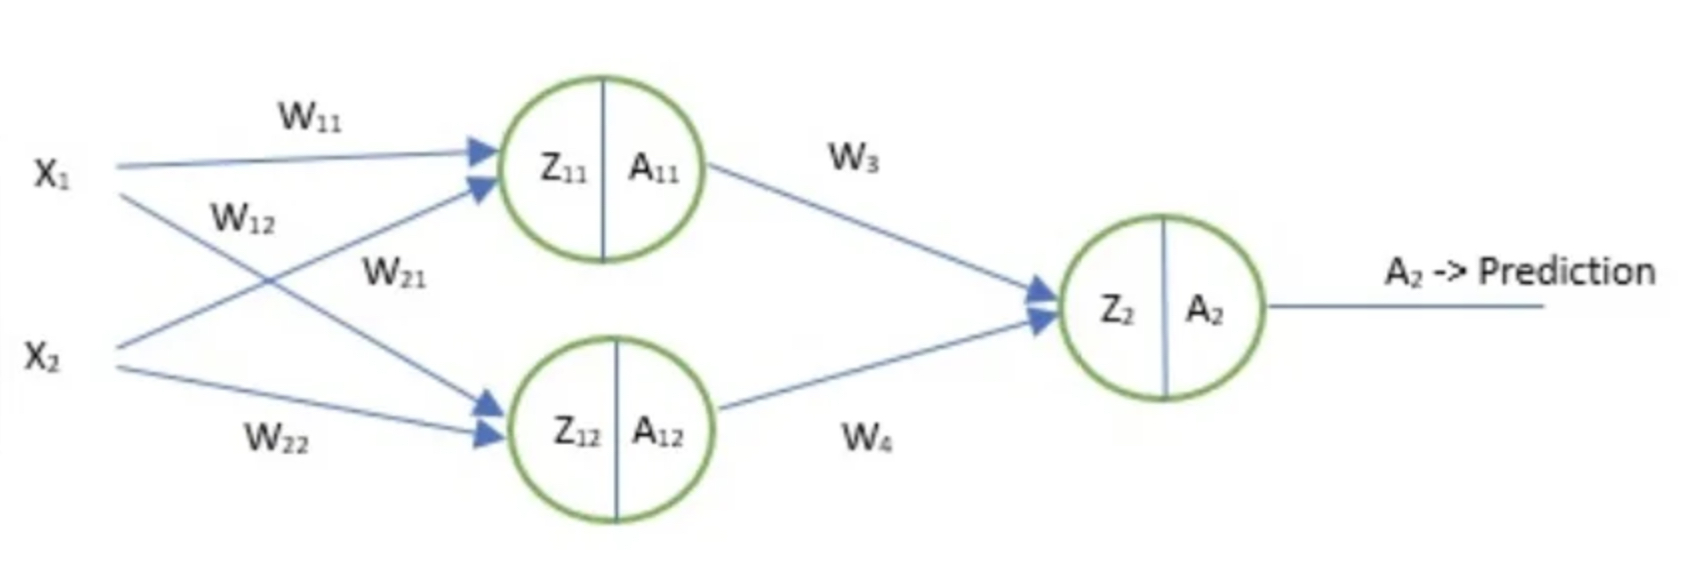

### **Imports:**

**NumPy:** Used for numerical computations, particularly for handling arrays and matrices which are fundamental in neural network operations.

**Matplotlib:** Utilized for plotting, likely for visualizing the loss curve or the decision boundary learned by the neural network.

### **Variables:**

**x, y:** Represent the input data and corresponding labels. In the context of XOR, x would be the input combinations, and y would be the XOR output.

**w1, w2:** Weights of the neural network layers, indicating the parameters that the network will learn to correctly map inputs to outputs.

**b1, b2:** Bias terms for the neural network layers, though not explicitly listed, might be inferred from context or combined within the weight variables.

**a1, a2:** Activation outputs from the neural network layers, with a2 likely representing the final output of the network.

**z1, z2:** Pre-activation values in the neural network layers, typically the result of input or previous layer output multiplied by the layer's weights plus the bias.
loss: Represents the error or loss value calculated to assess the performance of the network.

**epochs, lr, m:** Variables representing the number of training iterations (epochs), the learning rate (lr), and the number of training examples (m).

**dw1, dw2, dz1, dz2:** Variables related to gradients of the weights and pre-activations, used in the backpropagation to update the network parameters.

### **Functions:**

**forward_prop:** Function to perform forward propagation through the network, calculating activations based on current weights.

**back_prop:** Function to perform backpropagation, computing gradients based on the loss to update the weights.

**sigmoid, sigmoid_output_derivative:** Functions related to the sigmoid activation function, used to introduce non-linearity into the network and its derivative for the backpropagation process.

**predict:** Function to make predictions based on learned parameters after the network is trained.

### **Imports**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

y = np.array([[0,1,1,0]])

x = np.array([[0,0,1,1],
              [0,1,0,1]])

m = x.shape[1]

np.random.seed(42)
w1 = np.random.randn(2, 2)
w2 = np.random.randn(1, 2)

losses = []
w1_norms = []
w2_norms = []

### **Functions**

In [2]:
def sigmoid(z):
    z= 1/(1+np.exp(-z))
    return z

def sigmoid_output_derivative(x):
    return x * (1 - x)

# Forward propagation
def forward_prop(w1,w2,x):
    z1 = np.dot(w1,x)
    a1 = sigmoid(z1)    
    z2 = np.dot(w2,a1)
    a2 = sigmoid(z2)
    return z1,a1,z2,a2

# Backward propagation
def back_prop(m,w1,w2,z1,a1,z2,a2,y):
    dz2 = a2-y
    dw2 = np.dot(dz2, a1.T) / m
    dz1 = np.dot(w2.T,  dz2) * sigmoid_output_derivative(a1)
    dw1 = np.dot(dz1, x.T) / m
    return dz2,dw2,dz1,dw1

def predict(w1,w2,input):
    z1,a1,z2,a2 = forward_prop(w1,w2,input)
    a2 = np.squeeze(a2)
    if a2>=0.5:
        print("For input", [i[0] for i in input], "output is 1")
    else:
        print("For input", [i[0] for i in input], "output is 0")

### **Training**

In [3]:
epochs = 50000
stop = 0.1
beta = 0.9
lr = 0.12

v1 = np.zeros_like(w1)
v2 = np.zeros_like(w2)

# Training Neural Network
for i in range(epochs):
    z1, a1, z2, a2 = forward_prop(w1, w2, x)
    loss = -(1/m)*np.sum(y*np.log(a2)+(1-y)*np.log(1-a2))
    if loss < stop:
        print(f"Stopping early at epoch {i+1} with loss {loss:.4f}")
        break
    losses.append(loss)
    da2, dw2, dz1, dw1 = back_prop(m, w1, w2, z1, a1, z2, a2, y)
    
   # Update velocities
    v1 = beta * v1 - lr * dw1
    v2 = beta * v2 - lr * dw2
    
    # Update weights with current learning rate and momentum
    w1 += v1
    w2 += v2
    w1_norm = np.linalg.norm(w1, 'fro')
    w2_norm = np.linalg.norm(w2, 'fro')
    w1_norms.append(w1_norm)
    w2_norms.append(w2_norm)

Stopping early at epoch 2475 with loss 0.1000


### **Plots**

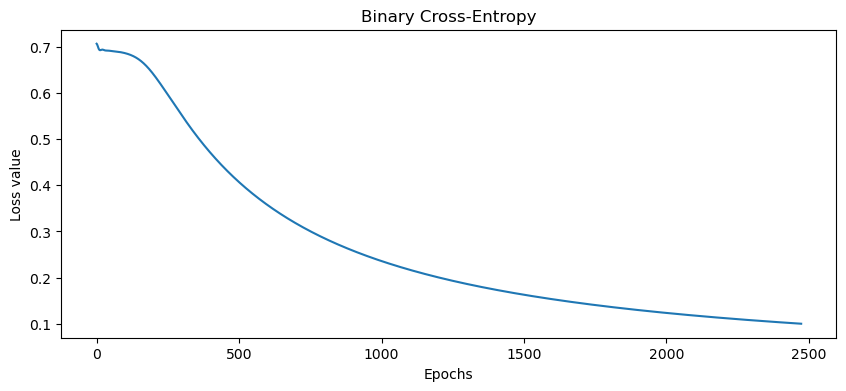

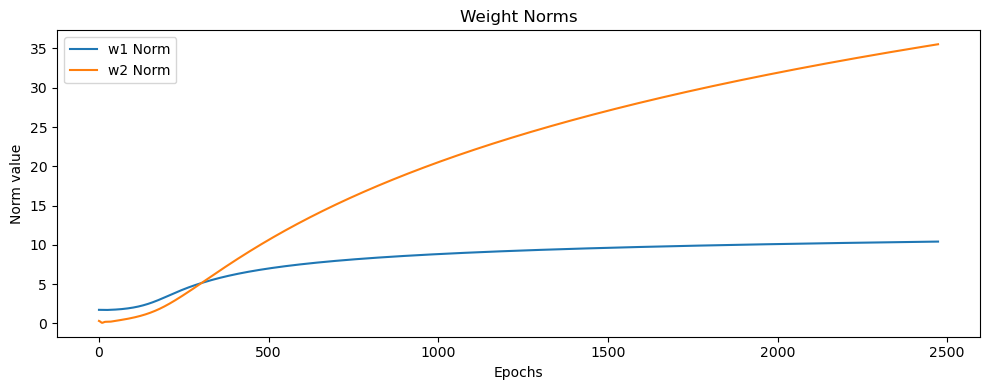

In [4]:
# Plot Loss
plt.figure(figsize=(10, 4))
plt.plot(losses)
plt.title('Binary Cross-Entropy')
plt.xlabel("Epochs")
plt.ylabel("Loss value")

# Plot Weight Norms
plt.figure(figsize=(10, 4))
plt.plot(w1_norms, label='w1 Norm')
plt.plot(w2_norms, label='w2 Norm')
plt.title('Weight Norms')
plt.xlabel("Epochs")
plt.ylabel("Norm value")
plt.legend()

plt.tight_layout()
plt.show()

### **Testing** 

In [9]:
# Testing Neural Network
test = np.array([[0],
                 [1]])

predict(w1, w2, test)
print(losses[len(losses)-1])

For input [0, 1] output is 1
0.10000560276248445


### **Observations::**

**Neural Network Structure:** The notebook outlines the architecture of a simple neural network designed to solve the XOR problem. The neural network has 2 hidden layers with sigmoid activation functions.

**Loss Function and Weight Norms:** The network employs binary cross-entropy as its loss function. There are plots tracking the loss over epochs, showing how the network's performance improves as training progresses. Additionally, weight norms are plotted, indicating changes in the magnitude of weights during training. These plots demonstrate convergence, suggesting that the network learns the XOR function effectively over time.

**Testing:** The network is tested with the input [0, 1], which correctly outputs 1, a typical result for an XOR operation. The final loss value after training is relatively low, suggesting good model performance on this particular input.

### **Summary:**
The neural network developed in the notebook successfully learns to solve the XOR problem, as evidenced by the testing section where it correctly predicts the output for given inputs. The plots of loss and weight norms provide useful insights into the training dynamics, showing effective learning and stabilization of weights over time. This successful application of a neural network to the XOR problem underscores the capability of even simple neural architectures to handle non-linearly separable data, a fundamental challenge in the field of machine learning.